# Dream Market's Cocaine 

## "Existe un amazon.com oculto dirigido al mundo de las drogas ilegales" 

Esta libreta se basa en un dataset que contine algunas variables interesantes con las cuales se espera obtener un panorama general sobre como se comportan las ventas de drogas ilegales en la dark web.


# Introduccion

En la actualidad las compras por internet se han convertido en algo completamente normal para las personas, hasta el punto en el que el mercado se ha convertido en el mundo entero, existen compradores para cualquier producto. Claro que como para aquellos productos que no se pueden comprar en la tiendita de la esquina existe un mercado negro, tambien existe un mercado negro de compras en internet, que va desde comprar (inserte su pensamiento mas bizarro aqui) hasta (otro aun mas bizarro aqui ). 

Dejando de lado sus pensamientos cochinos, en este documento hablaremos en concreto sobre el mundo de las drogas en internet ya que para algunas personas que no viven en México y que para su desgracia no tienen un "tiradero" en cada colonia de la ciudad abierto las 24 horas del dia, los 365 dias de la semana, existe aun una solucion.

#### Comprar drogas por internet.

Comprar drogas por internet es algo bastante serio, principalmente por que mantener el anonimato es algo imprescindible en el mundo virtual, tanto por el lado de los compradores como por el de los vendedores, asi que uno pensaria que es un poco dificil 
hacer este tipo de compras y la verdad es que si lo es, pero una vez dentro ¿Que es lo que a uno le espera? ¿cuanto podre comprar? ¿con que voy a pagar para que no me rastreen? ¿cuanto me va a costar? y un monton de pregunas mas.
Para comprender un poco mejor como funciona esto, usaremos el siguiente dataset: https://www.kaggle.com/everling/cocaine-listings que contiene informacion de aproximadamente 1400 productos, colectado mediante una tecnica de gathering llamada web-scraping, en el año 2017.







##  Datos del sitio web


In [1]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
import numpy as np
import pandas

## Resumen de los datos que contiene el archivo "coca.csv"

In [2]:
coca_datos = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
coca_datos.head(2)

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [3]:
coca_datos.columns # mostrando todas las columnas de nuestro dataset


Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

### Descripcion de las variables 

Con el resumen de los datos podemos darnos una pequeña idea de lo que trata este conjunto de datos.

Imaginense que son ustedes los que estan buscando comprar cocaina por internet, ¿que creen que es lo que motivaria su busqueda?.<br> 


![title](calidadcantidad.jpg)







### Estas son las variables mas reelevantes del dataset 
#### 'product_title'
contiene un resumen de lo que buscas (si es pura, la calidad, el costo) no en todos los casos 
#### 'ships_from_to'
(de donde viene y a donde se envia)
#### 'grams'
(la cantidad de gramos que un vendedor manda)
algunos vendedores se anuncian como "0.5G COCAINE 89% "  y otros "10 Gram 87% Pure Uncut Colombian Cocaine" como que no dejan lugar a que tu puedas comprar lo que te de la gana. 
#### 'quality'
La calidad de la cocaina que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.
#### 'btc_price'
el precio en bitcoins del producto que venden
#### 'cost_per_gram'
costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
costo por gramo de coca pura
#### 'product_link'
el enlace hacia el producto
#### 'vendor_link'
enlace del vendedor 
#### 'vendor_name'
nombre del vendedor
#### 'successful_transactions'
numero de transacciones exitosas
#### 'rating'
rating del vendedor 


    

### Formando el primer modelo de regresion con una variable

El costo de la cocaina  por gramo deberia estar relacionada con el costo por gramo puro
ya que de la pura como explicaba en la variable calidad se extrae la cocaina cortada, entonces podriamos tratar de predecir el precio de la coca en funcion de la cocaina pura.

es decir entre mayor sea el costo por gramo (puro), mayor deberia ser el costo por gramo cortado



### La forma de los datos

Aunque no es necesario que nuestras variables esten normalmente distribuidas para aplicar un metodo de regresion lineal, es importante ver la distribucion de los datos para darnos una idea de los problemas que nos pueden dar si no son tratados correctamente, conocer su comportamiento siempre es algo que beneficia bastante.

skewness cost_per_Gram = 3.3832638825649655
kurtosis cost_per_Gram = 17.302819732734246


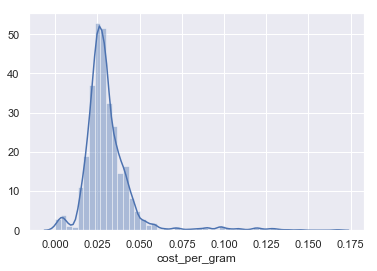

In [4]:
#### forma de las variables

sns.distplot (coca_datos['cost_per_gram'])
scpg=coca_datos['cost_per_gram'].skew()
kcpg=coca_datos['cost_per_gram'].kurt()
print ("skewness cost_per_Gram =",scpg)
print ("kurtosis cost_per_Gram =",kcpg)


skewness cost_per_gram_pure = 3.5409547807057127
kurtosis cost_per_gram_pure = 18.453014454694774


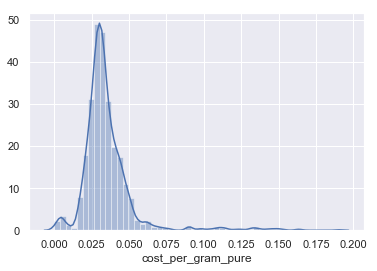

In [5]:

sns.distplot (coca_datos['cost_per_gram_pure'])
scpg=coca_datos['cost_per_gram_pure'].skew()
kcpg=coca_datos['cost_per_gram_pure'].kurt()
print ("skewness cost_per_gram_pure =",scpg)
print ("kurtosis cost_per_gram_pure =",kcpg)

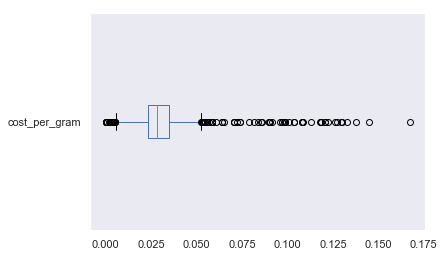

In [6]:
coca_datos.boxplot(column=['cost_per_gram'], grid = False,vert=False)

In [7]:

coca_datos.nlargest(10, ['cost_per_gram']) 



,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
56,224,.5g fishscale cocaine Lab Tested at 88% pure,AU → AU,0.5,88.0,0.0837,0.167400,0.190227,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
140,454,0.5g of Escobar's Colombian Cocaine 89% + A+++,"AU → AU, NZ",0.5,89.0,0.0724,0.144800,0.162697,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1405,4429,★0.5g Pure Bolivian Pearl Fire 90%+ {ESCROW},AU → AU,0.5,90.0,0.0689,0.137800,0.153111,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
202,624,1.0g of Escobar's Colombian Cocaine 89% + A++++,"AU → AU, NZ",1.0,89.0,0.1328,0.132800,0.149213,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
507,1439,1g fishscale cocaine Lab Tested at 88% pure,AU → AU,1.0,88.0,0.1298,0.129800,0.147500,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
559,1580,2.0g of Escobar's Colombian Cocaine 89% + A++++,"AU → AU, NZ",2.0,89.0,0.2587,0.129350,0.145337,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
173,537,1 Gram of Cocaine - PLATINUM QUALITY +90% PURE,AU → AU,1.0,90.0,0.1273,0.127300,0.141444,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
55,223,.5g crack cocaine Lab Tested at 88% pure,AU → AU,0.5,88.0,0.0632,0.126400,0.143636,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
829,2306,3.5g of Escobar's Colombian Cocaine 89% + A++++,"AU → AU, NZ",3.5,89.0,0.4280,0.122286,0.137400,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
540,1527,2 Grams of Cocaine - PLATINUM QUALITY +90% PURE,AU → AU,2.0,90.0,0.2414,0.120700,0.134111,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [8]:
cpgout= coca_datos['cost_per_gram']

#sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['cost_per_gram_pure'])

1.0340801332741978

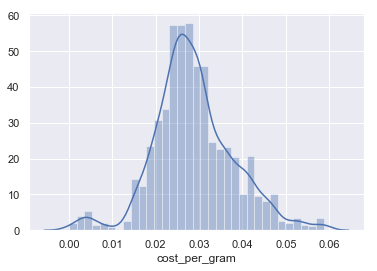

In [9]:
cout=cpgout[cpgout<=.06 ]
sns.distplot (cout)
cout.kurt()


0.6570555793621797

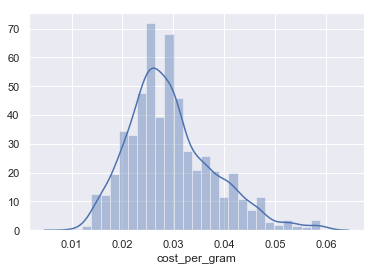

In [10]:

cout2=cout[cout>=.01]
sns.distplot(cout2)
cout2.kurt()

In [11]:
#coca_datos = coca_datos.drop(columns="rating")

coca_datos

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.025770,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.025750,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.032980,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.041200,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.034000,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
5,42,** 10 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,10.0,87.0,0.27050,0.027050,0.031092,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
6,43,** 2 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,2.0,87.0,0.06230,0.031150,0.035805,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
7,44,** 3 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,3.0,87.0,0.08900,0.029667,0.034100,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
8,45,** 5 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,5.0,87.0,0.14170,0.028340,0.032575,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
9,57,***** 0.5 gm uk to uk sociable cocaine 75%,GB → GB,0.5,75.0,0.01173,0.023460,0.031280,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#cout2.boxplot( grid = False,vert=False)

dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .06 ].index
coca_datos.drop(dropcoca , inplace=True)
#coca_datos

In [13]:
dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .01 ].index
coca_datos.drop(dropcoca , inplace=True)
#coca_datos

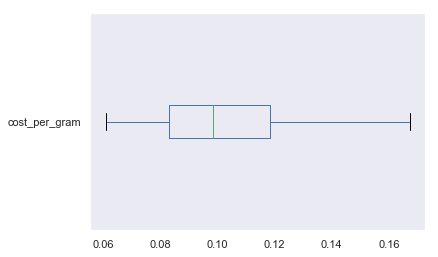

In [14]:

coca_datos.boxplot(column=['cost_per_gram'], grid = False,vert=False)
#coca_datos.boxplot(column=['cost_per_gram_pure'], grid = False,vert=False)

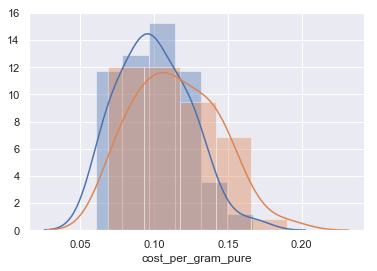

In [15]:
sns.distplot (coca_datos['cost_per_gram'])
sns.distplot (coca_datos['cost_per_gram_pure'])


In [16]:
coca_datos.corr()

,Unnamed: 0,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating,ships_to_US,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
Unnamed: 0,1.000000,0.161383,0.395246,0.193436,-0.114179,-0.241941,-0.084944,0.615301,0.188706,-0.210527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grams,0.161383,1.000000,-0.103441,0.976521,-0.261522,-0.206083,0.053699,-0.059788,0.245682,-0.102970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality,0.395246,-0.103441,1.000000,-0.100738,0.084311,-0.298371,-0.261469,0.272244,0.089087,-0.134777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
btc_price,0.193436,0.976521,-0.100738,1.000000,-0.189544,-0.135329,0.017212,-0.025336,0.262316,-0.113443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_per_gram,-0.114179,-0.261522,0.084311,-0.189544,1.000000,0.922706,-0.502705,-0.002343,0.501180,-0.169096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_per_gram_pure,-0.241941,-0.206083,-0.298371,-0.135329,0.922706,1.000000,-0.352510,-0.112010,0.467309,-0.125805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
escrow,-0.084944,0.053699,-0.261469,0.017212,-0.502705,-0.352510,1.000000,-0.039618,-0.280825,0.227314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
successful_transactions,0.615301,-0.059788,0.272244,-0.025336,-0.002343,-0.112010,-0.039618,1.000000,-0.017072,-0.070284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,0.188706,0.245682,0.089087,0.262316,0.501180,0.467309,-0.280825,-0.017072,1.000000,-0.020008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ships_to_US,-0.210527,-0.102970,-0.134777,-0.113443,-0.169096,-0.125805,0.227314,-0.070284,-0.020008,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#sns.distplot (coca_datos['rating'])

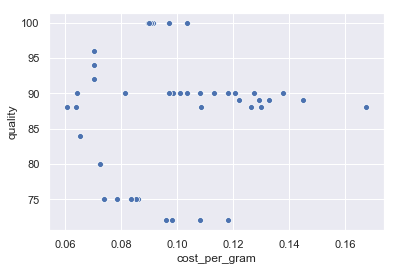

In [18]:
#sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['cost_per_gram_pure'])
sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['quality'])

In [19]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = coca_datos).fit()
#lm = smf.ols ( formula = "cost_per_gram ~ rating", data = coca_datos).fit()

In [20]:
lm.params

Intercept             0.010598
cost_per_gram_pure    0.778261
dtype: float64

el modelo lineal predictivo seria

costo = 0.020108+0.711129*cost_per_gram_pure



In [21]:
lm.pvalues

Intercept             6.778414e-02
cost_per_gram_pure    1.145350e-20
dtype: float64

In [22]:
lm.rsquared

0.8513861094131268

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.15e-20
Time:                        16:15:33   Log-Likelihood:                 157.18
No. Observations:                  48   AIC:                            -310.4
Df Residuals:                      46   BIC:                            -306.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0106      0.006      1.871      0.068      -0.001       0.022
cost_per_gram_pure     0.7783      0.048     16.234      0.000       0.682       0.875
==============================================================================
Omnibus:                        6.811   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.926
Skew:                          -0.900   Prob(JB):                       0.0313
Kurtosis:                       2.530   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
coca_pred=lm.predict(pd.DataFrame(coca_datos["cost_per_gram_pure"]))
#coca_pred=lm.predict(pd.DataFrame(coca_datos["rating"]))

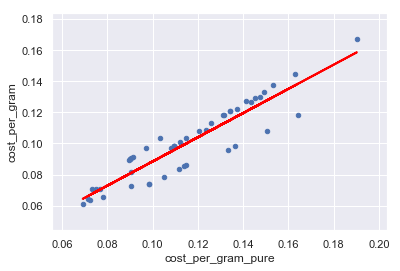

In [25]:
coca_datos.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(coca_datos["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)

#coca_datos.plot(kind="scatter",x="rating", y="cost_per_gram")
#plt.plot(pd.DataFrame(coca_datos["rating"]),coca_pred, c="red", linewidth=2)

In [26]:
coca_datos["coca_pred"]= 0.010598+ 0.778261*coca_datos["cost_per_gram_pure"]
coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2

#coca_datos["coca_pred"]= -0.972627 +  0.217667*coca_datos["cost_per_gram_pure"]
#coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2

In [27]:
SSD = sum (coca_datos["RSE"])
SSD

0.004022630883102458

In [28]:
RSE = np.sqrt (SSD/(len(coca_datos)-2))
RSE

0.00935139013509484

In [29]:
cpgmean = np.mean(coca_datos["cost_per_gram"])
cpgmean

0.09992882605833332

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.40641949, -0.30641949, -0.20641949, -0.10641949, -0.00641949,
         0.09358051,  0.19358051,  0.29358051,  0.39358051,  0.49358051,
         0.59358051]),
 <a list of 10 Patch objects>)

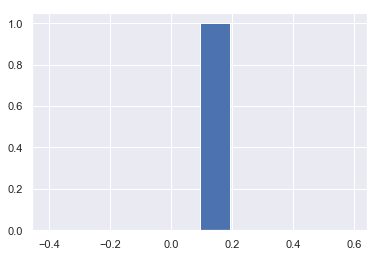

In [30]:
error = RSE/cpgmean
error
plt.hist(error)

(array([ 4.,  3.,  3.,  1.,  1.,  3.,  5., 16.,  5.,  7.]),
 array([-0.02016714, -0.01691744, -0.01366775, -0.01041805, -0.00716836,
        -0.00391866, -0.00066897,  0.00258073,  0.00583042,  0.00908012,
         0.01232981]),
 <a list of 10 Patch objects>)

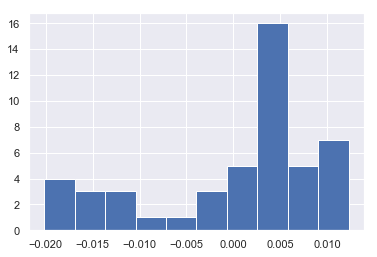

In [31]:
plt.hist((coca_datos["cost_per_gram"] - coca_datos["coca_pred"]))

# regresion multiple 
precio de la coca normal en funcion de el rating y costo por gram puro a

In [32]:
lm2 = smf.ols(formula = "cost_per_gram ~ cost_per_gram_pure+rating", data=coca_datos).fit()

In [33]:
lm2.params

Intercept            -0.176985
cost_per_gram_pure    0.742966
rating                0.038891
dtype: float64

In [34]:
lm2.rsquared

0.8576535828523126

In [35]:
coca_preds=lm2.predict(coca_datos[["cost_per_gram_pure","rating"]])

In [36]:
coca_preds

49      0.080421
55      0.121464
56      0.156079
88      0.081596
99      0.063556
140     0.138347
156     0.061023
172     0.098972
173     0.118668
202     0.128330
352     0.086744
353     0.098962
360     0.117723
505     0.106435
507     0.124334
539     0.098129
540     0.113220
559     0.125450
684     0.086780
685     0.094923
692     0.115328
792     0.096509
793     0.111203
811     0.138332
829     0.119552
882     0.070486
1068    0.091556
1069    0.111109
1075    0.128042
1076    0.098724
1175    0.069655
1206    0.068446
1228    0.064425
1267    0.087741
1268    0.092347
1269    0.082232
1270    0.083432
1271    0.082126
1272    0.082816
1273    0.082391
1327    0.067286
1405    0.129281
1407    0.098783
1408    0.098902
1409    0.115164
1410    0.095718
1411    0.108926
1412    0.104916
dtype: float64

In [37]:
SSD= sum((coca_datos["cost_per_gram"]-coca_preds)**2)

In [38]:
SSD

0.003852985014625825

In [39]:
RSE = np.sqrt(SSD/(len(data)-2-1))

NameError: name 'data' is not defined

In [40]:
RSE

0.00935139013509484

In [41]:
error2=RSE/cpgmean

In [42]:
error2

0.0935805062859037

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.92e-20
Time:                        16:15:43   Log-Likelihood:                 158.21
No. Observations:                  48   AIC:                            -310.4
Df Residuals:                      45   BIC:                            -304.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1770      0.133     -1.327      0.191      -0.446       0.092
cost_per_gram_pure     0.7430      0.054     13.846      0.000       0.635       0.851
rating                 0.0389      0.028      1.408      0.166      -0.017       0.095
==============================================================================
Omnibus:                        7.817   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.158
Skew:                          -1.002   Prob(JB):                       0.0169
Kurtosis:                       2.751   Cond. No.                         521.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# validacion del modelo 

(array([ 2.,  2.,  0.,  2.,  6.,  8., 11.,  9.,  3.,  5.]),
 array([-2.80173728, -2.33794608, -1.87415487, -1.41036366, -0.94657245,
        -0.48278125, -0.01899004,  0.44480117,  0.90859238,  1.37238358,
         1.83617479]),
 <a list of 10 Patch objects>)

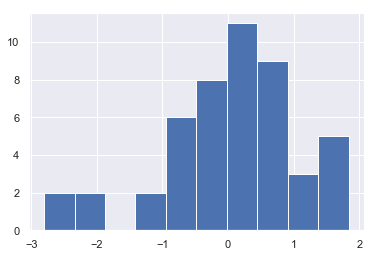

In [44]:
a = np.random.randn(len(coca_datos))
plt.hist(a)

In [45]:
check = (a<0.8)
training =coca_datos[check]#conjunto de entrenamiento 80%
testing =coca_datos[~check]#conjunto de testing 20%

In [46]:
lm= smf.ols(formula ="cost_per_gram ~ cost_per_gram_pure+rating", data=training).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.94e-16
Time:                        16:15:47   Log-Likelihood:                 126.73
No. Observations:                  39   AIC:                            -247.5
Df Residuals:                      36   BIC:                            -242.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1043      0.146     -0.713      0.480      -0.401       0.192
cost_per_gram_pure     0.7658      0.061     12.590      0.000       0.642       0.889
rating                 0.0234      0.030      0.770      0.446      -0.038       0.085
==============================================================================
Omnibus:                        5.957   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.165
Skew:                          -0.802   Prob(JB):                       0.0756
Kurtosis:                       2.223   Cond. No.                         488.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

validacion con el conjunto de testing 

In [48]:
c_pred = lm.predict(testing)
c_pred

140     0.137060
505     0.105338
1206    0.067017
1267    0.085734
1268    0.090482
1271    0.079946
1408    0.097238
1410    0.093956
1412    0.103438
dtype: float64

In [49]:
SSD = sum ((testing["cost_per_gram"]-c_pred)**2)
SSD

0.0005221739264879854

In [50]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

0.009328932830072127

In [51]:
cpgmm=np.mean(testing["cost_per_gram"])
error = RSE/cpgmm
error

0.09121455904413439

# regresion con scikit learn

In [52]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
feature_cols = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions"]

In [53]:
x=coca_datos[feature_cols]
y=coca_datos["cost_per_gram"]

In [54]:
estimator = SVR (kernel ="linear")
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)

In [55]:
selector.support_

array([False, False, False,  True,  True])

In [56]:
selector.ranking_

array([4, 3, 2, 1, 1])

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
x_pred = x[["quality","successful_transactions"]]

In [59]:
lm= LinearRegression()
lm.fit(x_pred,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
lm.intercept_

0.07735440153296727

In [61]:
lm.coef_

array([ 2.62580186e-04, -1.20447883e-06])

In [62]:
lm.score(x_pred,y)

0.007799427993949948

# clustering 

(array([ 10.,   0.,   0.,   5.,  40.,  37., 142., 256., 921.,  93.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 10 Patch objects>)

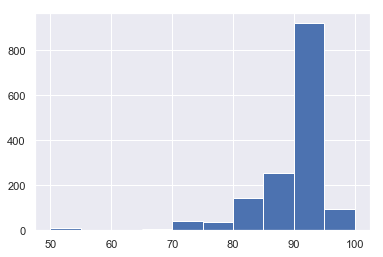

In [88]:
clustcoca = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv


plt.hist(clustcoca["quality"])

In [89]:
clustcoca

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.025770,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.025750,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.032980,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.041200,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.034000,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
5,42,** 10 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,10.0,87.0,0.27050,0.027050,0.031092,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
6,43,** 2 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,2.0,87.0,0.06230,0.031150,0.035805,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
7,44,** 3 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,3.0,87.0,0.08900,0.029667,0.034100,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
8,45,** 5 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,5.0,87.0,0.14170,0.028340,0.032575,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
9,57,***** 0.5 gm uk to uk sociable cocaine 75%,GB → GB,0.5,75.0,0.01173,0.023460,0.031280,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [90]:

clustcoca.head()


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [91]:
clustcoca.shape


(1504, 64)

In [92]:
clustcoca.drop('product_title',axis=1, inplace=True)

In [93]:
clustcoca.shape

(1504, 63)

## clustering jerarquico 

In [94]:
clustcoca.drop('ships_from_to',axis=1, inplace=True)


In [95]:
clustcoca.drop('product_link',axis=1, inplace=True)

In [96]:
clustcoca.shape

(1504, 61)

In [154]:
#clustcoca.head()

In [98]:
clustcoca.drop('vendor_link',axis=1, inplace=True)

In [153]:
#clustcoca.head()

In [102]:
clustcoca.drop('vendor_name',axis=1, inplace=True)

In [152]:
#clustcoca.head()

In [106]:
clustcoca.drop('ships_from',axis=1, inplace=True)
clustcoca.drop('ships_to_SE',axis=1, inplace=True)
clustcoca.drop('ships_to_CO',axis=1, inplace=True)
clustcoca.drop('ships_to_CN',axis=1, inplace=True)
clustcoca.drop('ships_to_PL',axis=1, inplace=True)
clustcoca.drop('ships_from_PL',axis=1, inplace=True)
clustcoca.drop('ships_to_GR',axis=1, inplace=True)

In [147]:
#clustcoca.head()

In [110]:
clustcoca.drop('ships_to_CH',axis=1, inplace=True)
clustcoca.drop('ships_from_CH',axis=1, inplace=True)
clustcoca.drop('ships_to_BR',axis=1, inplace=True)
clustcoca.drop('ships_from_BR',axis=1, inplace=True)
clustcoca.drop('ships_to_CZ',axis=1, inplace=True)
clustcoca.drop('ships_from_CZ',axis=1, inplace=True)
clustcoca.drop('ships_from_SE',axis=1, inplace=True)
clustcoca.drop('ships_from_CO',axis=1, inplace=True)
clustcoca.drop('ships_from_CN',axis=1, inplace=True)
clustcoca.drop('ships_from_GR',axis=1, inplace=True)


In [148]:
#clustcoca.head()

In [112]:
clustcoca.drop('ships_from_S. America',axis=1, inplace=True)
clustcoca.drop('ships_to_S. America',axis=1, inplace=True)
clustcoca.drop('ships_from_DK',axis=1, inplace=True)
clustcoca.drop('ships_to_DK',axis=1, inplace=True)
clustcoca.drop('ships_from_IT',axis=1, inplace=True)
clustcoca.drop('ships_to_IT',axis=1, inplace=True)
clustcoca.drop('ships_from_SI',axis=1, inplace=True)
clustcoca.drop('ships_to_SI',axis=1, inplace=True)
clustcoca.drop('ships_from_WW',axis=1, inplace=True)
clustcoca.drop('ships_to_WW',axis=1, inplace=True)

In [149]:
#clustcoca.head()

In [114]:
clustcoca.drop('ships_from_BE',axis=1, inplace=True)
clustcoca.drop('ships_to_BE',axis=1, inplace=True)
clustcoca.drop('ships_from_N. America',axis=1, inplace=True)
clustcoca.drop('ships_to_N. America',axis=1, inplace=True)
clustcoca.drop('ships_from_ES',axis=1, inplace=True)
clustcoca.drop('ships_from_EU',axis=1, inplace=True)
clustcoca.drop('ships_from_AU',axis=1, inplace=True)
clustcoca.drop('ships_to_AU',axis=1, inplace=True)


In [120]:
clustcoca.shape
clustcoca.drop('ships_from_BE',axis=1, inplace=True)
clustcoca.drop('ships_to_BE',axis=1, inplace=True)
clustcoca.drop('ships_from_N. America',axis=1, inplace=True)
clustcoca.drop('ships_to_N. America',axis=1, inplace=True)
clustcoca.drop('ships_from_ES',axis=1, inplace=True)
clustcoca.drop('ships_from_EU',axis=1, inplace=True)
clustcoca.drop('ships_from_AU',axis=1, inplace=True)
clustcoca.drop('ships_to_AU',axis=1, inplace=True)


(1504, 24)

In [150]:
#clustcoca.head()

In [122]:
clustcoca.drop('ships_to_ES',axis=1, inplace=True)
clustcoca.drop('ships_to_EU',axis=1, inplace=True)
clustcoca.drop('ships_from_DE',axis=1, inplace=True)
clustcoca.drop('ships_to_DE',axis=1, inplace=True)
clustcoca.drop('ships_from_CA',axis=1, inplace=True)
clustcoca.drop('ships_to_CA',axis=1, inplace=True)
clustcoca.drop('ships_from_GB',axis=1, inplace=True)
clustcoca.drop('ships_to_GB',axis=1, inplace=True)
clustcoca.drop('ships_from_FR',axis=1, inplace=True)
clustcoca.drop('ships_to_FR',axis=1, inplace=True)

In [124]:
clustcoca.drop('ships_from_NL',axis=1, inplace=True)
clustcoca.drop('ships_to_NL',axis=1, inplace=True)
clustcoca.drop('ships_from_US',axis=1, inplace=True)
clustcoca.drop('ships_to_US',axis=1, inplace=True)
clustcoca.drop('ships_to',axis=1, inplace=True)

In [185]:
clustcoca.drop('Unnamed: 0',axis=1, inplace=True)

In [151]:
#clustcoca.head()

In [186]:
from sklearn.cluster import AgglomerativeClustering

In [187]:
clust=AgglomerativeClustering(n_clusters=6, linkage="ward").fit(clustcoca)

In [188]:
md=pd.Series(clust.labels_)

Text(0, 0.5, 'numero de coca cluster')

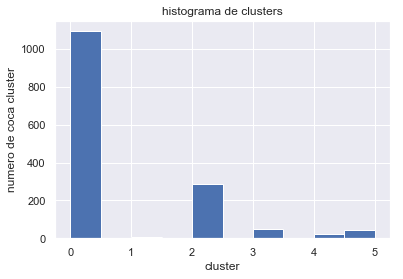

In [189]:
plt.hist(md)
plt.title("histograma de clusters")
plt.xlabel("cluster")
plt.ylabel ("numero de coca cluster")

In [190]:
clust.children_

array([[ 432,  433],
       [ 121,  122],
       [ 522,  523],
       ...,
       [3001, 3002],
       [3000, 3004],
       [3003, 3005]], dtype=int64)

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [160]:
z=linkage(clustcoca, "ward")

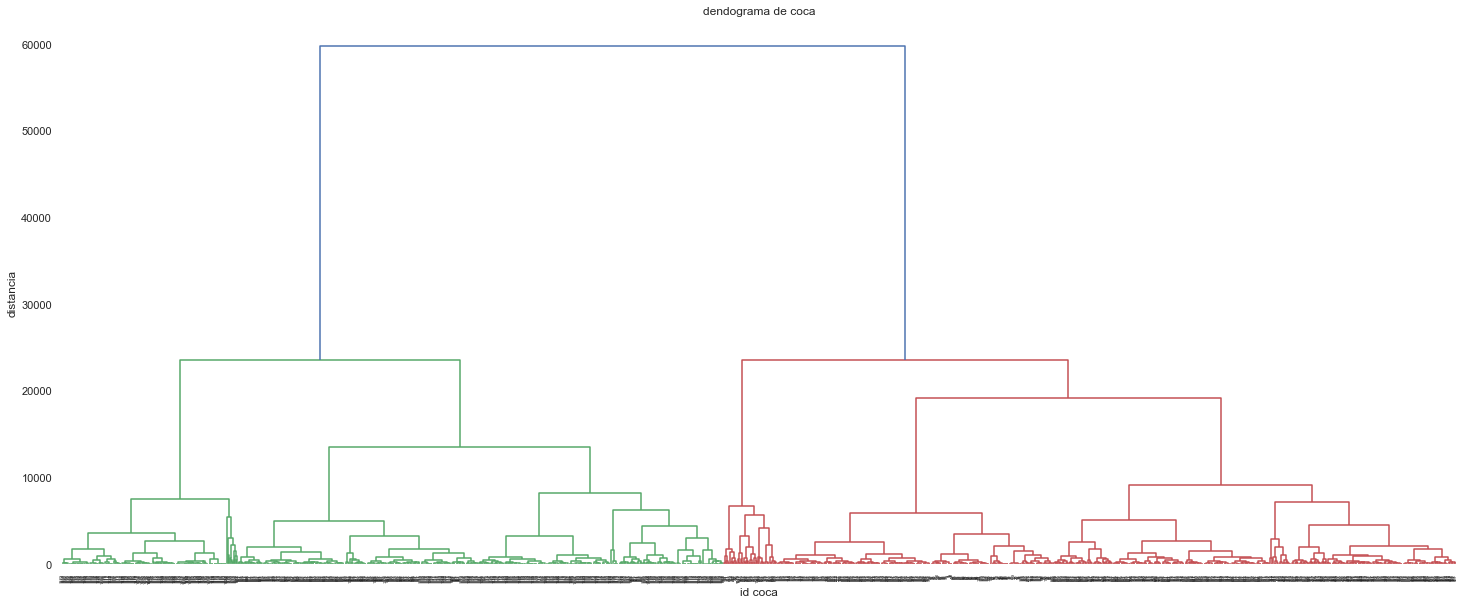

In [192]:
plt.figure (figsize = (25,10))
plt.title("dendograma de coca")
plt.xlabel("id coca")
plt.ylabel("distancia")
dendrogram(z, leaf_rotation=90.,leaf_font_size=4.)
plt.show()

In [193]:
from sklearn.cluster import KMeans
from sklearn import datasets


In [194]:
model =KMeans (n_clusters=6)
model.fit (clustcoca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [195]:
model.labels_

array([0, 0, 2, ..., 0, 0, 5])

In [196]:
md_k = pd.Series (model.labels_)
clustcoca2=clustcoca
clustcoca2["clust_her"]=md
clustcoca2["clust_k"]=md_k

(array([1085.,    0.,   50.,    0.,  289.,    0.,    7.,    0.,   21.,
          52.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

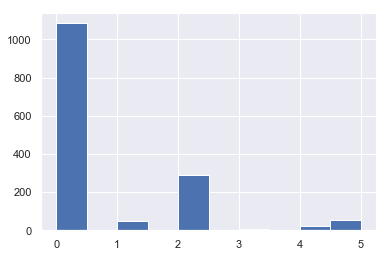

In [197]:
plt.hist(md_k)


In [198]:
clustcoca2.head()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating,clust_her,clust_k
0,1.0,90.0,0.02577,0.02577,0.028633,1,90,4.63,0,0
1,2.0,90.0,0.05150,0.02575,0.028611,1,90,4.63,0,0
2,0.5,89.0,0.01649,0.03298,0.037056,1,620,4.94,2,2
3,1.0,89.0,0.04120,0.04120,0.046292,1,15,5.00,0,0
4,1.0,87.0,0.03400,0.03400,0.039080,1,28,4.78,0,0


# interpretacion 

In [199]:
clustcoca2.groupby("clust_k").mean()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating,clust_her
clust_k,,,,,,,,,
0,20.820415,88.571244,0.510153,0.031119,0.035266,0.776037,127.882949,4.884912,0.000000
1,40.500000,89.240000,0.800944,0.043643,0.048832,0.700000,1955.000000,4.918400,3.000000
2,21.727820,87.868512,0.542684,0.031542,0.035788,0.723183,660.622837,4.874775,1.944637
3,2571.428571,91.428571,35.570000,0.014549,0.015950,0.142857,208.571429,4.937143,1.000000
4,44.523810,92.142857,0.939000,0.024749,0.026880,1.000000,3250.000000,4.910000,4.000000
5,750.000000,88.711538,13.592308,0.018583,0.021056,0.519231,270.115385,4.875000,4.653846
